## Q1
Write a brief about what function the method LinearRegression().fit() performs

## A1

#### Import The Libraries

In [178]:

# importing the libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from tabulate import tabulate
from sklearn import model_selection as ms
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



#### Load the Train Data Set

In [179]:
# load the training data set 

with open('data/train.pkl', 'rb') as f:
    unpickler = pkl.Unpickler(f)
    train_file = unpickler.load()
    train_ = pd.DataFrame(train_file, columns=['Area', 'Price'])

print(tabulate(train_, headers='keys', tablefmt='psql'))

+------+--------------+---------------+
|      |         Area |         Price |
|------+--------------+---------------|
|    0 |  27.4277     |   3335.78     |
|    1 |  -4.96183    |   2647.4      |
|    2 | -27.8612     |    520.734    |
|    3 | -15.3463     |   3518.92     |
|    4 |   2.86733    |  -3217.7      |
|    5 |  16.8517     |    224.702    |
|    6 | -33.1346     |  -5426.58     |
|    7 |  21.201      |   3237.71     |
|    8 |   5.78804    |  -5538.94     |
|    9 |  29.3573     |   2643.57     |
|   10 | -22.848      |  -1844.92     |
|   11 | -21.03       |  -8168.07     |
|   12 |  -1.88541    |   5399.05     |
|   13 | -31.375      |  -5872.74     |
|   14 |  27.7567     |    352.307    |
|   15 |  26.2196     |  -1465.08     |
|   16 |  -8.58984    |  -1364.69     |
|   17 |  32.2439     |   5561.99     |
|   18 | -28.0022     |  -1303.3      |
|   19 |   8.92308    |   4560.18     |
|   20 |   2.06456    |   1942        |
|   21 | -20.0694     |  -2364.02     |


#### Load The Test Data Set

In [180]:
# loading the test data set 

with open('data/test.pkl', 'rb') as f:
    unpickler = pkl.Unpickler(f)
    test_file = unpickler.load()
    test_ = pd.DataFrame(test_file, columns=['Area', 'Price'])

print(tabulate(test_, headers='keys', tablefmt='psql'))

+----+---------+--------------+
|    |    Area |        Price |
|----+---------+--------------|
|  0 | -15.029 |  -351.992    |
|  1 | -25.977 | -1807.03     |
|  2 |  -4.48  |    -9.00368  |
|  3 |   2.527 |     2.13889  |
|  4 |  18.039 |   590.201    |
|  5 | -25.795 | -1769.43     |
|  6 |  31.794 |  3251.01     |
|  7 |   6.804 |    31.4508   |
|  8 |   8.512 |    61.4764   |
|  9 |  22.505 |  1149.09     |
| 10 |  26.159 |  1807.46     |
| 11 |  23.114 |  1245.29     |
| 12 |   4.291 |     8.19314  |
| 13 |  -5.684 |   -18.9048   |
| 14 | -32.41  | -3502.84     |
| 15 |   2.667 |     2.40583  |
| 16 |  -1.673 |     0.158943 |
| 17 |  -3.507 |    -4.01763  |
| 18 | -34.867 | -4359        |
| 19 |  -1.008 |     0.57654  |
| 20 |   1.197 |     0.8221   |
| 21 | -22.883 | -1236.71     |
| 22 |  27.132 |  2017.47     |
| 23 |  -4.557 |    -9.50406  |
| 24 |   2.968 |     3.08651  |
| 25 | -26.747 | -1972.01     |
| 26 |   7.406 |    40.5089   |
| 27 | -20.874 |  -939.632    |
| 28 | -

##### Load the training data
[-] Extracted the data from the training data set and generated 16 different training models ( with each model was found to contain 500 data set )

In [181]:
# storing the training data set 
# takking random sample of size 500 from the data set

training_samples = []
training_samples.append(train_.sample(frac=1/16))
for i in range(1, 16):
    temp = train_.drop(training_samples[0].index)
    #print(len(temp))
    training_samples.append(train_.sample(frac=1/(16-i)))



traning_samples is array of length 16 that contains the training data-set, later this array is used to find models 

In the code below, the trained_models is a 2D array that is going to store the trained model based on the training set

In [182]:

# trained models we have , the coefficients and the intercepts
# using PolynomialFeatures to create a polynomial features
# using LinearRegression to train the model
# storing the learned model in array object 

trained_models = []
for j in range(1, 16):
    trained_model_poly = []
    poly = PolynomialFeatures(degree=j)
    for i in range(0, 16):
        x_train = np.array(training_samples[i]['Area']).reshape(-1, 1)
        x_transform_train = poly.fit_transform(x_train)
        y_train = np.array(training_samples[i]['Price']).reshape(-1, 1)
        temp = LinearRegression(fit_intercept=False).fit(
            x_transform_train, y_train)
        trained_model_poly.append(temp)
    trained_models.append(trained_model_poly)

# jth model for ith degree polynomial 
# for i in range(0, 15):
#     for j in range(0, 16):
#         print(trained_models[i][j].coef_)


`trained_models[i][j]` stores the training model for polynomial of degree (i+1) and training set j. There are 15 different polynomial of degree 1,2,....15 and for each polynomial we have found a training model based on 16 different data sets.

So `i lies in range [0,14]` and `j lies in range[0,15]`

Procedure to get the training model
1. We manipulated the `training_samples[i]['Area']` into an array of arrays(containing only 1 element).
2. The new array we got is passed to function `poly.fit_transform()`, this fnction will give us the values of 1, x, x^2, ....x^i for each x present in the passed array. This is stroed in x_transform_train
3. Similarily we manipulated the `training_samples[i]['Price']`. This is stroed in y_train.
4. We passed the x_transform_train and y_train to the function `LinearRegression()` which will give us a best fit curve. Which is stored in training_models array

Store the test data <br>
And <br>
Finding Bias, variance, MSE and irreducible error

In [183]:

# store the x and y values of the test data set 

x_test = np.array(test_['Area']).reshape(-1, 1)
y_test = np.array(test_['Price']).reshape(-1, 1)

# store the bias of the data sets
# for each degree of polynomial we'll have 16 bias values and we'll have 15 such values
# bias_poly[15][16]
# storing them in an array of array

# store the predicted values of y for each degree of polynomial
y_predicted = []
bias = []
sq_bias = []
variance = []
mse = []
irr_err = []
for i in range(1, 16):
    poly_ = PolynomialFeatures(degree=i)
    x_transform_test = poly_.fit_transform(x_test)
    temp = []
    sum = np.zeros([len(y_test)]).reshape(-1, 1)
    square = np.zeros([len(y_test)]).reshape(-1, 1)
    mse_err = np.zeros([len(y_test)]).reshape(-1, 1)
    variance_subpart = np.zeros([len(y_test)]).reshape(-1, 1)

    for j in range(16):
        temp.append(trained_models[i-1][j].predict(x_transform_test))
        sum = sum + temp[j]
        square = square + np.square(temp[j])
        mse_err = mse_err + np.square(y_test - temp[j])
    predicted_values = sum/16
    variance_subpart = square/16 - np.square(predicted_values)
    mse_err = mse_err/16
    bias.append(np.mean(abs(predicted_values - y_test)))
    sq_bias.append(np.mean(np.square(predicted_values - y_test)))
    variance.append(np.mean(variance_subpart))
    mse.append(np.mean(mse_err))
    irr_err.append(mse[i-1] - variance[i-1] - sq_bias[i-1])
    y_predicted.append(predicted_values)

# print(x_test)


80


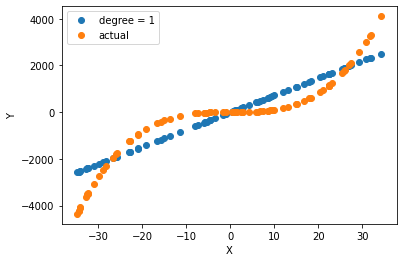

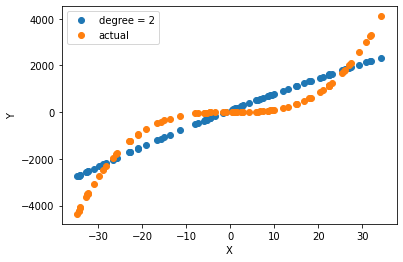

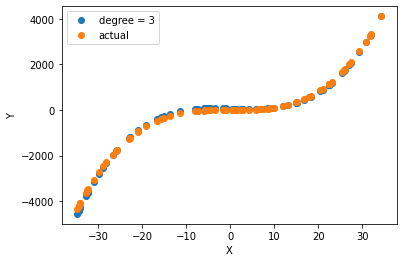

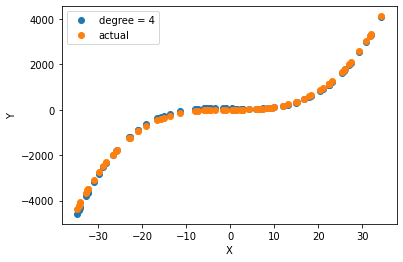

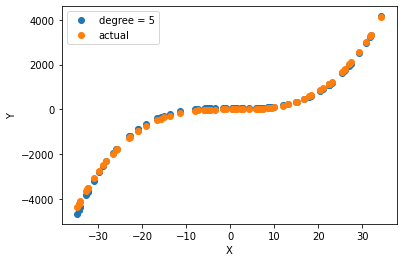

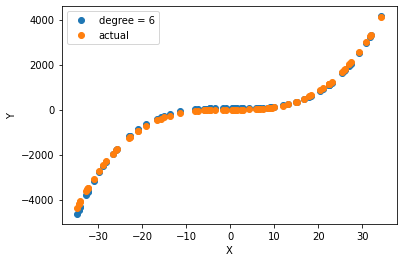

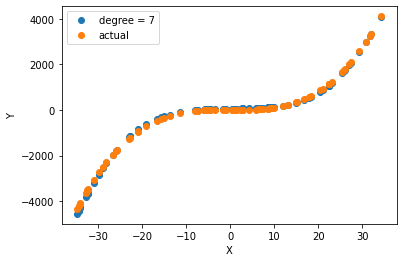

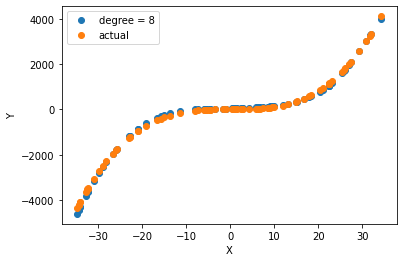

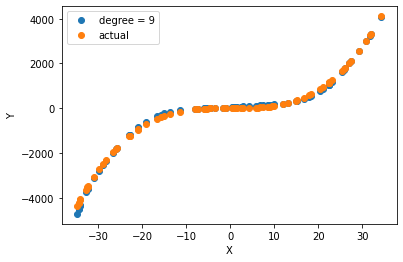

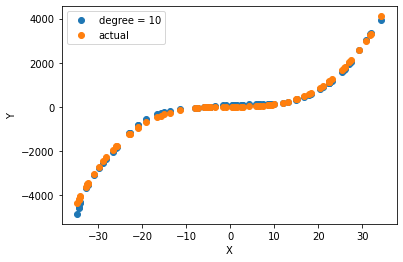

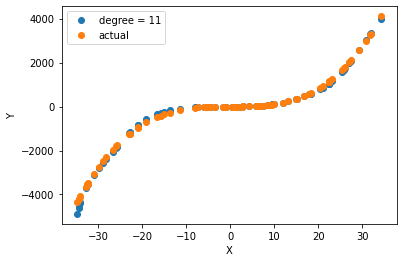

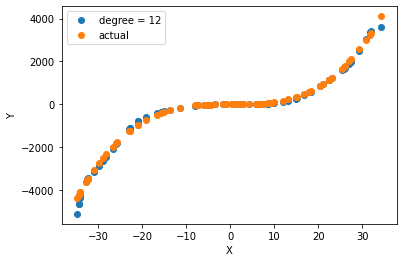

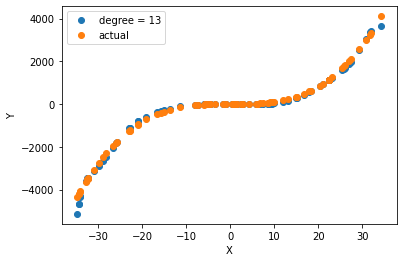

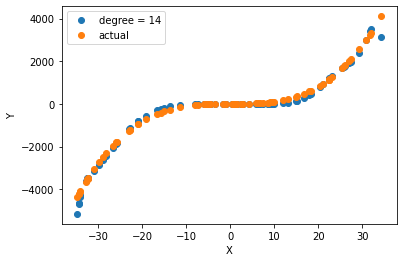

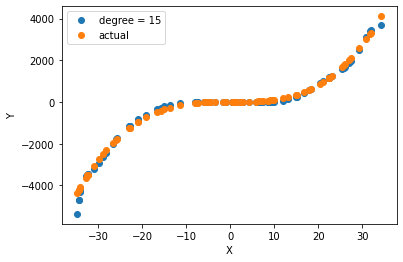

In [198]:
for i in range(1, 16):
    plt.plot(x_test, y_predicted[i-1], 'o', label='degree = ' + str(i)) 
    plt.plot(x_test, y_test, 'o', label='actual')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


In [184]:

# Bias
print(tabulate({
    "degree": [j for j in range(1, 16)],
    "bias": bias,
    "variance": variance}, headers='keys', tablefmt='psql'))
# print(bias)
# print(variance)
# print(mse)
# print(irr_err)


+----------+----------+------------+
|   degree |     bias |   variance |
|----------+----------+------------|
|        1 | 573.182  |    14221.3 |
|        2 | 564.924  |    20298.9 |
|        3 |  60.9895 |    23076.1 |
|        4 |  59.8314 |    29177.4 |
|        5 |  67.5023 |    34668.3 |
|        6 |  65.3659 |    49289.6 |
|        7 |  68.492  |    58608.4 |
|        8 |  69.9226 |    62024.4 |
|        9 |  71.6979 |    69880.3 |
|       10 |  78.0307 |    76142.6 |
|       11 |  61.7604 |    68485.5 |
|       12 |  76.6648 |    76798.6 |
|       13 |  80.2631 |    73246.4 |
|       14 | 105.31   |    77004.3 |
|       15 |  90.8299 |    76356   |
+----------+----------+------------+


#### Bias And Variance

In [185]:
print(tabulate({
    "degree": [j for j in range(1, 16)],
    "Mean Squared Erro": mse,
    "irreducible error": irr_err}, headers='keys', tablefmt='psql'))

+----------+---------------------+---------------------+
|   degree |   Mean Squared Erro |   irreducible error |
|----------+---------------------+---------------------|
|        1 |            511568   |        -5.82077e-11 |
|        2 |            487053   |        -1.74623e-10 |
|        3 |             29051.4 |        -3.65617e-10 |
|        4 |             35469.2 |        -4.91127e-11 |
|        5 |             42821.3 |        -3.12866e-10 |
|        6 |             56902.5 |         8.4583e-11  |
|        7 |             65641.8 |        -1.40062e-10 |
|        8 |             69767.7 |         1.00044e-11 |
|        9 |             79534.8 |         2.72848e-10 |
|       10 |             89139.1 |        -1.81899e-11 |
|       11 |             80433.8 |         2.41926e-10 |
|       12 |             97473.5 |         2.91038e-11 |
|       13 |             94278.3 |        -1.09139e-10 |
|       14 |            111038   |         4.36557e-11 |
|       15 |            103409 

Plotting Variance vs Bias^2

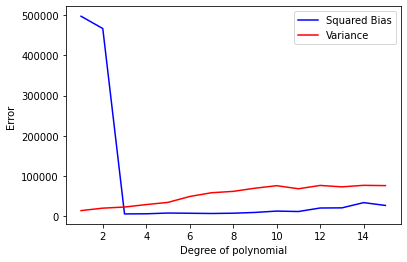

In [186]:
plt.plot(range(1, 16), sq_bias, 'b', label='Squared Bias')
plt.plot(range(1, 16), variance, 'r', label='Variance')
plt.xlabel('Degree of polynomial')
plt.ylabel('Error ')
plt.legend()
plt.show()